In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from functools import reduce

ModuleNotFoundError: No module named 'matplotlib'

# Gather data from csv files

In [2]:
# Get list of files in directory
csv_files = [csv for csv in os.listdir() if csv.startswith('cart')]

In [3]:
# Create list of df
df_list= [pd.read_csv(x) for x in csv_files] # , index_col='Item'

In [4]:
# Iterate over df_list and change Price label according to Date
for df in df_list:
    df.sort_values('Item', inplace=True)
    df.drop_duplicates(inplace=True)
    df['Price'] = [x.strip('$c') for x in df['Price']]
    
    for x in df['Price']:
        df['Price'] = df['Price'].astype(float)

    date = pd.to_datetime(df['Date']).max().strftime('%m-%d-%Y') # grab max date
    df.rename(columns={'Price': date}, inplace=True) # change column label to date
    df.drop(columns='Date', inplace=True) # Remove columns no longer needed

df_list

[                                                  Item  04-03-2020
 5733                   #10 6MM Bamboo Needles 35MM1 ea        4.98
 5469                   #11 8MM Bamboo Needles 35MM1 ea        5.48
 5577            #3/4/6/7 Crochet Hooks, Value Pack1 ea        8.98
 5716                       #6 4MM Circular Needles1 ea        4.48
 3053                        $10 Popcorn Chicken1.13 kg       10.00
 ...                                                ...         ...
 7118                                uSee Eye Patch1 ea        3.98
 6999                 uSwim Soft Silicone Ear Plugs4 ea        4.48
 7158                     uSwim Soft Wax Ear Plugs12 ea        6.98
 6984  uTemp 10 Second Flex Tip Digital Thermometer1 ea       14.98
 7186                      uTravel Travel Ear Plugs2 ea        7.48
 
 [6695 rows x 2 columns],
                                         Item  04-07-2020
 5378         #11 8MM Bamboo Needles 35MM1 ea        5.48
 5692  #2/4/5/8 Crochet Hooks, Value Pac

# Visualization

In [5]:
df = reduce(
    lambda left, right: pd.merge(left, right, on='Item'), 
    df_list
)

In [11]:
df.drop_duplicates(inplace=True)

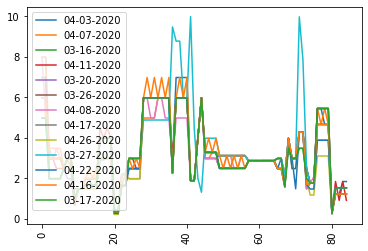

In [12]:
df.plot(rot=90)

In [13]:
df

,Item,04-03-2020,04-07-2020,03-16-2020,04-11-2020,03-20-2020,03-26-2020,04-08-2020,04-17-2020,04-26-2020,03-27-2020,04-22-2020,04-16-2020,03-17-2020
0,Blueberries340 g,7.98,7.98,4.98,5.98,6.98,6.98,7.98,5.98,4.98,4.98,4.98,5.98,4.98
1,Blueberries340 g,7.98,7.98,4.98,5.98,6.98,6.98,4.98,5.98,4.98,4.98,4.98,5.98,4.98
2,Broccoli1 ea,1.98,3.48,1.98,2.97,2.98,1.98,3.48,2.98,2.98,1.98,2.98,2.98,1.98
3,Broccoli1 ea,1.98,3.48,1.98,2.97,2.98,1.98,2.97,2.98,2.98,1.98,2.98,2.98,1.98
4,Broccoli1 ea,1.98,3.48,1.98,2.48,2.98,1.98,3.48,2.98,2.98,1.98,2.98,2.98,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,White Mushrooms,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26,0.26
81,Zucchini,1.22,1.22,1.53,1.84,1.53,1.53,1.22,1.22,1.22,1.53,1.22,1.22,1.53
82,Zucchini,1.22,1.22,1.53,0.91,1.53,1.53,1.22,1.22,1.22,1.53,1.22,1.22,1.53
83,Zucchini,1.84,1.22,1.53,1.84,1.53,1.53,1.22,1.22,1.22,1.53,1.22,1.22,1.53
